<a href="https://colab.research.google.com/github/ahaque12/fiddler-march-madness-2024/blob/main/Fiddler_on_the_Proof_March_Madness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fiddler on the Proof -- March Madness
https://thefiddler.substack.com/p/can-you-survive-march-madness

The single-elimination tournament brackets consists of 64 teams spread across four regions, each with teams seeded 1 through 16. (In recent years, additional teams beyond the 64 have been added, but you needn’t worry about these teams for this week’s puzzle.)

Among the 16 teams in a region, you might wonder which team has the toughest schedule. One way to evaluate a team’s strength of schedule within the region is to compute the geometric mean of strongest opponents a team can face in various rounds.

For example, the 1-seed faces the 16-seed in the first round, then (potentially) the 8-seed in the second round, then (potentially) the 4-seed in the third round, and finally (potentially) the 2-seed in the fourth round. The geometric mean of these opponents is the fourth root (since there are four opponents) of 16 · 8 · 4 · 2, or approximately 5.28. In this computation, we used the 8-seed rather than the 9-seed because 8 is less than 9, we used the 4 seed rather than the 5-seed, 12-seed, or 13-seed because 4 is less than 5, 12, and 13, and so on. The tougher a team’s strength of schedule, the lower this geometric mean.

Of the 16 teams in the region, which two seeds have the toughest strength of schedule?


In [1]:
import numpy as np
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# Array length 16 represents matchups. First index plays second index in first
# round, winner plays winner of third and fourth index in second round, etc.
matchups = np.arange(1, 17)
matchups

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [86]:
march_madness = np.array([1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15])
march_madness

array([ 1, 16,  8,  9,  5, 12,  4, 13,  6, 11,  3, 14,  7, 10,  2, 15])

In [179]:
def toughness(matchups, i):

  seeds = np.ones(4)

  x = i // 2
  x = 2*x + 1 if 2*x==i else 2*x
  seeds[0] = matchups[x]

  x = i // 4

  x = 4*x + 2 if (i % 4) < 2 else 4*x
  seeds[1] = np.min(matchups[x:x+1])

  x = i // 4
  if x == 0:
    x = 4
  elif x == 1:
    x = 0
  elif x == 2:
    x = 12
  else:
    x = 8
  seeds[2] = np.min(matchups[x:x+3])

  x = 8 if i < 8 else 0
  seeds[3] = np.min(matchups[x:x+7])

  return gmean(seeds), seeds

def helper(matchups, i, cum=1):

  size = len(matchups)
  mid = int(size / 2)

  if size == 2:
    return cum*matchups[1-i]

  if i < mid:
    return helper(matchups[:mid], i, cum*np.min(matchups[mid:]))
  else:
    return helper(matchups[mid:], i - mid, cum*np.min(matchups[:mid]))

def toughness_optimized(matchups, i):
  return np.power(helper(matchups, i, 1), 1 / np.log2(len(matchups)))

def generate_matchups(n):
  """Generate matchups for 2^n teams.
  """
  size = 2**n
  matchups = np.ones(size)

  mid = int(size / 2)

  outer = 1
  inner = mid
  oi = True
  i = 0
  while True:
    print(inner, outer, matchups)
    if inner < outer:
      break
    if oi:
      matchups[i] = outer
      matchups[i+1] = size - outer + 1
      matchups[size - i - 2] = outer + 1
      matchups[size - i - 1] = size - outer
      outer += 2
    else:
      matchups[i] = inner
      matchups[i+1] = size - inner + 1
      matchups[size - i - 2] = size - inner - 1
      matchups[size - i - 1] = inner + 2
      inner -= 2
    oi = not oi
    i += 2

  return matchups

In [183]:
def generate_matchups(n):
  size = 2**n
  mid = size // 2

  matchups = np.ones(size)
  for i in range(mid):
    x = i
    matchups[x] = i + 1
    matchups[x+1] = size - i

  return matchups

generate_matchups(4)

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 1., 1., 1., 1., 1., 1., 1.])

In [188]:
def generate_matchups(n):
  """
  Generates a full single-elimination tournament bracket represented by an array
  for a bracket of 2^n teams, considering March Madness seed placement.

  Args:
      n: The power of 2 representing the number of rounds in the tournament (e.g., n=4 for 16 teams).

  Returns:
      A numpy array representing the bracket matchups (higher seed advances).

  Raises:
      ValueError: If n is not a positive integer.
  """

  if n <= 0:
    raise ValueError("n must be a positive integer.")

  # Calculate total number of teams (2^n)
  num_teams = 2**n

  # Define seeds for the entire bracket (assuming even number of teams)
  half_seeds = list(range(1, num_teams // 2 + 1))[::-1] + list(range(num_teams // 2 + 2, num_teams + 1))

  # Initialize bracket with all teams based on seeds
  bracket = np.array(half_seeds)

  return bracket

# Example usage (bracket for 16 teams)
generate_matchups(4)


array([ 8,  7,  6,  5,  4,  3,  2,  1, 10, 11, 12, 13, 14, 15, 16])

In [185]:
sorted(list(zip(range(16), march_madness)), key=lambda x: x[1])

[(0, 1),
 (14, 2),
 (10, 3),
 (6, 4),
 (4, 5),
 (8, 6),
 (12, 7),
 (2, 8),
 (3, 9),
 (13, 10),
 (9, 11),
 (5, 12),
 (7, 13),
 (11, 14),
 (15, 15),
 (1, 16)]

In [180]:
generate_matchups(4)

8 1 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
8 3 [ 1. 16.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2. 15.]
6 3 [ 1. 16.  8.  9.  1.  1.  1.  1.  1.  1.  1.  1.  7. 10.  2. 15.]
6 5 [ 1. 16.  8.  9.  3. 14.  1.  1.  1.  1.  4. 13.  7. 10.  2. 15.]
4 5 [ 1. 16.  8.  9.  3. 14.  6. 11.  9.  8.  4. 13.  7. 10.  2. 15.]


array([ 1., 16.,  8.,  9.,  3., 14.,  6., 11.,  9.,  8.,  4., 13.,  7.,
       10.,  2., 15.])

In [175]:

def generate_matchups(n):
    """
    Generates matchups according to the March Madness seeds for 2^n teams.

    Parameters:
    n (int): The exponent to determine the number of teams (2^n).

    Returns:
    numpy.array: An array of matchups where teams are represented by their seed numbers.
    """
    # The number of teams is 2 to the power of n
    num_teams = 2**n
    # Creating an array to hold the matchups
    matchups = np.zeros(num_teams, dtype=int)

    # Assigning matchups based on the seeding logic for March Madness
    for i in range(1, num_teams // 2 + 1):
        # The top half seeds face the corresponding seed from the bottom half in reverse order
        matchups[(i-1)*2] = i
        matchups[(i-1)*2 + 1] = num_teams - i + 1

    return matchups


generate_matchups(4)

array([ 1, 16,  2, 15,  3, 14,  4, 13,  5, 12,  6, 11,  7, 10,  8,  9])

In [176]:
generate_matchups(4)

array([ 1, 16,  2, 15,  3, 14,  4, 13,  5, 12,  6, 11,  7, 10,  8,  9])

In [115]:
n = 3
sum(range(1, n)) / 2**n

0.375

In [106]:
for i in range(16):
  if np.isclose(toughness(march_madness, i)[0],toughness_optimized(march_madness, i)):
    print(i, "Yes")
  else:
    print(i, "No")

0 Yes
1 Yes
2 Yes
3 Yes
4 Yes
5 Yes
6 Yes
7 Yes
8 Yes
9 Yes
10 Yes
11 Yes
12 Yes
13 Yes
14 Yes
15 Yes


In [34]:
toughness(matchups, 3)[0] == toughness_optimized(matchups, 3)

True

In [91]:
%%timeit
toughness(matchups, 0)

400 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [92]:
%%timeit
toughness_optimized(matchups, 0)

19.1 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [93]:
toughness(march_madness, 0)

(5.656854249492381, array([16.,  8.,  4.,  2.]))

In [94]:
tough_list = [toughness(march_madness, i) for i in range(16)]
tough_list

[(5.656854249492381, array([16.,  8.,  4.,  2.])),
 (2.82842712474619, array([1., 8., 4., 2.])),
 (2.9129506302439405, array([9., 1., 4., 2.])),
 (2.82842712474619, array([8., 1., 4., 2.])),
 (3.1301691601465746, array([12.,  4.,  1.,  2.])),
 (2.514866859365871, array([5., 4., 1., 2.])),
 (3.3766483753851806, array([13.,  5.,  1.,  2.])),
 (2.514866859365871, array([4., 5., 1., 2.])),
 (2.8502698827717987, array([11.,  3.,  2.,  1.])),
 (2.449489742783178, array([6., 3., 2., 1.])),
 (3.600205743678508, array([14.,  6.,  2.,  1.])),
 (2.449489742783178, array([3., 6., 2., 1.])),
 (2.783157683713741, array([10.,  2.,  3.,  1.])),
 (2.54572989502183, array([7., 2., 3., 1.])),
 (4.212865930610521, array([15.,  7.,  3.,  1.])),
 (2.54572989502183, array([2., 7., 3., 1.]))]

In [95]:
t = [x[0] for x in tough_list]

In [102]:
t2 = [toughness_optimized(march_madness, i) for i in range(16)]
list(zip(march_madness, t2))

[(1, 5.656854249492381),
 (16, 2.8284271247461903),
 (8, 2.9129506302439405),
 (9, 2.8284271247461903),
 (5, 3.1301691601465746),
 (12, 2.514866859365871),
 (4, 3.3766483753851806),
 (13, 2.514866859365871),
 (6, 2.8502698827717983),
 (11, 2.449489742783178),
 (3, 3.6002057436785084),
 (14, 2.449489742783178),
 (7, 2.7831576837137404),
 (10, 2.5457298950218306),
 (2, 4.212865930610521),
 (15, 2.5457298950218306)]

<BarContainer object of 16 artists>

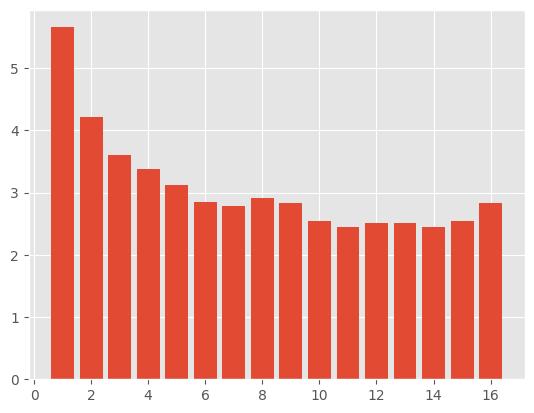

In [97]:
plt.bar(march_madness, t)

In [99]:
print("The seeds with the toughest matches are {}".format(march_madness[np.argsort(t)[:2]]))

The seeds with the toughest matches are [11 14]
